Simple Movie Recommender system using simple formulas::::

In [1]:
import numpy as np
import pandas as pd

In [2]:
Movie_data = pd.read_csv('IMDBdata_hotlist2.csv', low_memory=False)
Movie_data.head(15)

,Movie_Title,YR_Released,Rating,Num_Reviews,Movie_ID,Record,Runtime
0,Code Name: K.O.Z.,2015,1.4,24623,tt4458206,Bottom 250 Movies,114.0
1,Saving Christmas,2014,1.5,12765,tt4009460,Bottom 250 Movies,80.0
2,Superbabies: Baby Geniuses 2,2004,1.6,26505,tt0270846,Bottom 250 Movies,88.0
3,Daniel the Wizard,2004,1.6,13295,tt0421051,Bottom 250 Movies,81.0
4,Manos: The Hands of Fate,1966,1.7,31808,tt0060666,Bottom 250 Movies,70.0
5,Pledge This!,2006,1.7,15836,tt0417056,Bottom 250 Movies,91.0
6,Dünyayi Kurtaran Adam'in Oglu,2006,1.8,14110,tt0808240,Bottom 250 Movies,110.0
7,Foodfight!,2012,1.8,5740,tt0249516,Bottom 250 Movies,91.0
8,Birdemic: Shock and Terror,2010,1.8,15919,tt1316037,Bottom 250 Movies,105.0
9,Álom.net,2009,1.9,8502,tt1309000,Bottom 250 Movies,NaN


In [3]:
#title = Movie_data["Movie_Title"]
#title.head()

# Select duplicate rows except first occurrence based on all columns
duplicateRowsDF = Movie_data[Movie_data.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)
#Rows Checked Now titles turn
Movie_data.drop_duplicates('Movie_Title', inplace = True)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [Movie_Title, YR_Released, Rating, Num_Reviews, Movie_ID, Record, Runtime]
Index: []


We will consider Rating as average rating and Num_Reviews equals to average reviews given.

Now we ill follow a formula:


Weighted Rating (WR) = (v / v+m .R) + (m / v+m .C)

where,

v is the number of votes for the movie;
m is the minimum votes required to be listed in the chart;
R is the average rating of the movie; And
C is the mean vote across the whole report

In [4]:
C = Movie_data["Rating"].mean()
print(C)

7.103675344563553


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

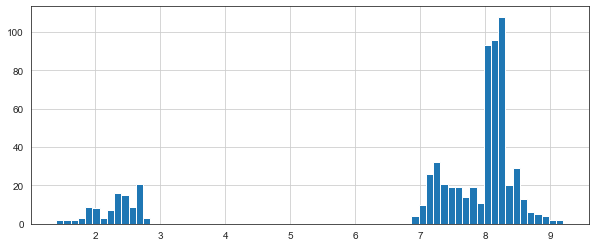

In [6]:
plt.figure(figsize=(10,4))
Movie_data['Rating'].hist(bins=70)

In [7]:
m = Movie_data["Num_Reviews"].quantile(0.9)
print(m)

644763.0


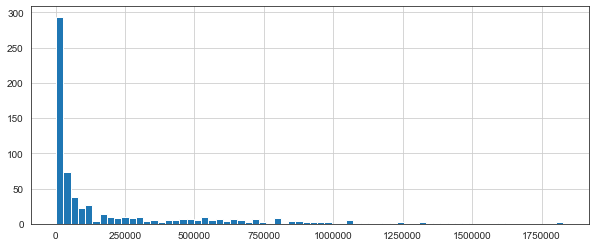

In [8]:
plt.figure(figsize=(10,4))
Movie_data['Num_Reviews'].hist(bins=70)

In [9]:
q_movies = Movie_data.copy().loc[Movie_data['Num_Reviews'] >= m]
q_movies.shape

(66, 7)

In [10]:
q_movies.head()

,Movie_Title,YR_Released,Rating,Num_Reviews,Movie_ID,Record,Runtime
100,The Shawshank Redemption,1994,9.2,1829037,tt0111161,Top 250 Eng Movies,142.0
101,The Godfather,1972,9.2,1249333,tt0068646,Top 250 Eng Movies,175.0
102,The Godfather: Part II,1974,9.0,860228,tt0071562,Top 250 Eng Movies,202.0
103,The Dark Knight,2008,9.0,1808543,tt0468569,Top 250 Eng Movies,152.0
105,Schindler's List,1993,8.9,939136,tt0108052,Top 250 Eng Movies,195.0


In [11]:
# Function that computes the weighted rating of each movie
def weighted_rating(x, m=m, C=C):
    v = x['Num_Reviews']
    R = x['Rating']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)


In [12]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [16]:
#q_movies.head()
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)
q_movies.head(15)

,Movie_Title,YR_Released,Rating,Num_Reviews,Movie_ID,Record,Runtime,score
100,The Shawshank Redemption,1994,9.2,1829037,tt0111161,Top 250 Eng Movies,142.0,8.653621
103,The Dark Knight,2008,9.0,1808543,tt0468569,Top 250 Eng Movies,152.0,8.501619
101,The Godfather,1972,9.2,1249333,tt0068646,Top 250 Eng Movies,175.0,8.486397
107,Pulp Fiction,1994,8.9,1432193,tt0110912,Top 250 Eng Movies,154.0,8.342355
106,The Lord of the Rings: The Return of the King,2003,8.9,1311271,tt0167260,Top 250 Eng Movies,201.0,8.307882
108,Fight Club,1999,8.8,1465931,tt0137523,Top 250 Eng Movies,139.0,8.281816
110,Forrest Gump,1994,8.8,1375185,tt0109830,Top 250 Eng Movies,142.0,8.258537
109,The Lord of the Rings: The Fellowship of the Ring,2001,8.8,1332276,tt0120737,Top 250 Eng Movies,178.0,8.246785
112,Inception,2010,8.7,1599451,tt1375666,Top 250 Eng Movies,148.0,8.241376
102,The Godfather: Part II,1974,9.0,860228,tt0071562,Top 250 Eng Movies,202.0,8.187583


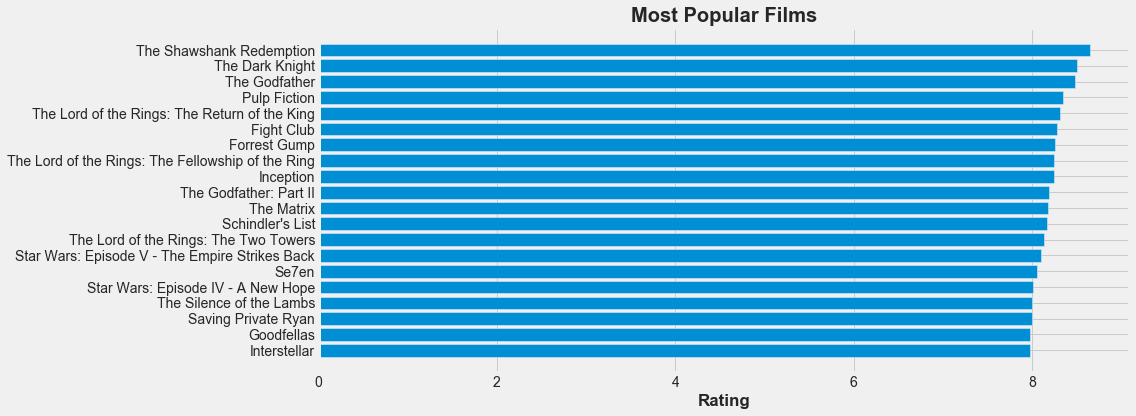

In [32]:
import matplotlib as mt
from matplotlib import pyplot as plt
#ax = sns.barplot(x=popular['popularity'].head(10), y=popular['original_title'].head(10), data=popular, palette='deep')
plt.style.use("fivethirtyeight")
movtit = q_movies['Movie_Title'].head(20)
movtitrev = movtit.iloc[::-1] #movtit.reverse()
plt.figure(figsize=(16,6))
movsc = q_movies['score'].head(20)
movscrev =  movsc.iloc[::-1]#reverse()
plt.barh(movtitrev, movscrev)

plt.title("Most Popular Films",weight = 'bold')
# plt.ylabel("Programming Languages")
plt.xlabel("Rating",weight = 'bold')

plt.tight_layout()

plt.show()